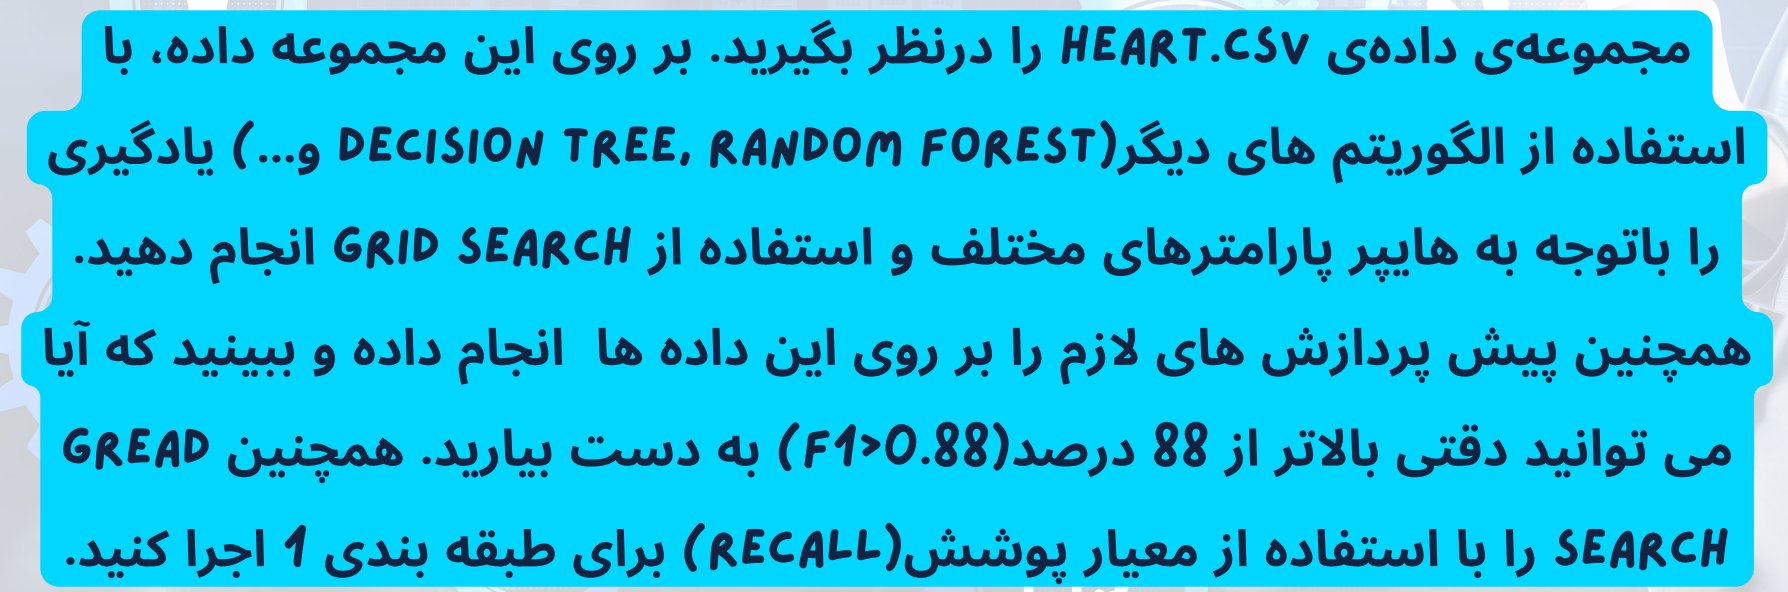

# **import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn import metrics

%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', 30)

# **Load Data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Classification/heart.csv")

# **Dataset Overview**

> **Introduction:**
- In this notebook, we intend to analyze data related to cardiac features of patients from the "heart.csv" dataset. This dataset provides various information about patients, including age, gender, blood pressure, cholesterol levels, electrocardiographic (ECG) features, and more.

**Dataset Information:**

This dataset includes the following features:

- age: The age of the patient.
- sex: Gender of the patient (0: female, 1: male).
- cp: Type of chest pain:

        0: No chest pain
        1: Typical angina (chest pain related to reduced blood flow to the heart)
        2: Atypical angina (non-anginal chest pain)
        3: Non-anginal pain (non-cardiac chest pain)

- trestbps: Resting blood pressure.
- chol: Serum cholesterol.
- fbs: Fasting blood sugar > 120 mg/dl.
- restecg: Resting electrocardiographic results.
- thalach: Maximum heart rate achieved.
- exang: Exercise induced angina.
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of the peak exercise ST segment:

        0: Upsloping
        1: Flat
        2: Downsloping

- ca: Number of major vessels colored by fluoroscopy (the number of vessels colored with dye, an indication of heart problems).

- thal: Thalassemia test result:

        1: Normal
        2: Fixed defect
        3: Reversable defect

- target: Presence or absence of heart disease (0: No heart disease, 1: Presence of heart disease)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
row, col = data.shape
print(f"Number of Row: {row}")
print(f"Number of Columns: {col}")

Number of Row: 303
Number of Columns: 14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# **EDA**

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

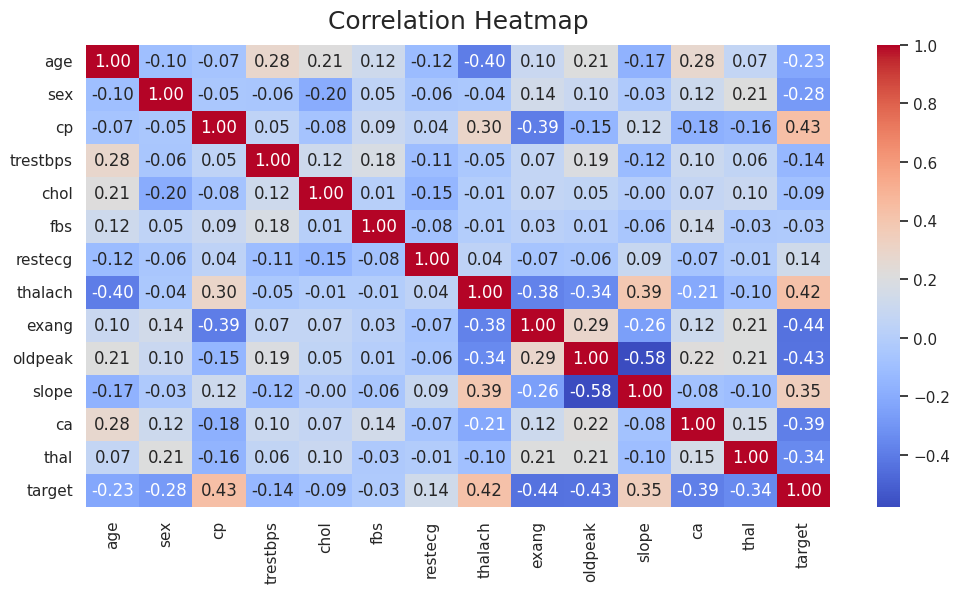

In [ ]:

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

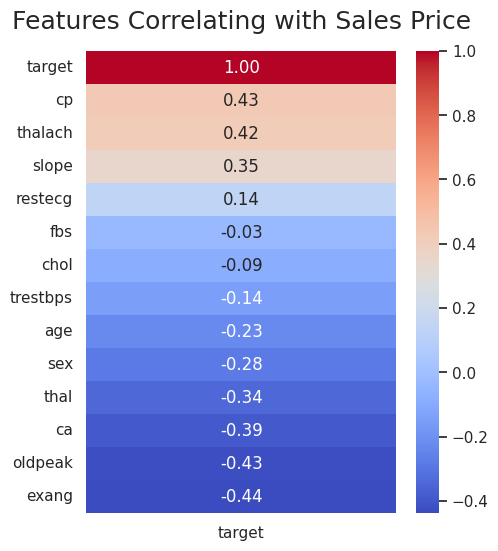

In [ ]:
plt.figure(figsize=(5, 6))
heatmap = sns.heatmap(data.corr()[["target"]].sort_values(by="target", ascending=False),
                      annot=True, cmap='coolwarm', fmt=".2f"
)
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [ ]:
def plot_distributions(data, color='blue'):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    num_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    num_rows = math.ceil(num_features / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

    for i, column in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        axs[row][col].hist(data[column], bins=30, alpha=0.5, color=color)
        axs[row][col].set_title(f'Distribution of {column}')
        axs[row][col].set_xlabel(column)
        axs[row][col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show

In [ ]:
selected_col_hist = [
    "age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak"
]

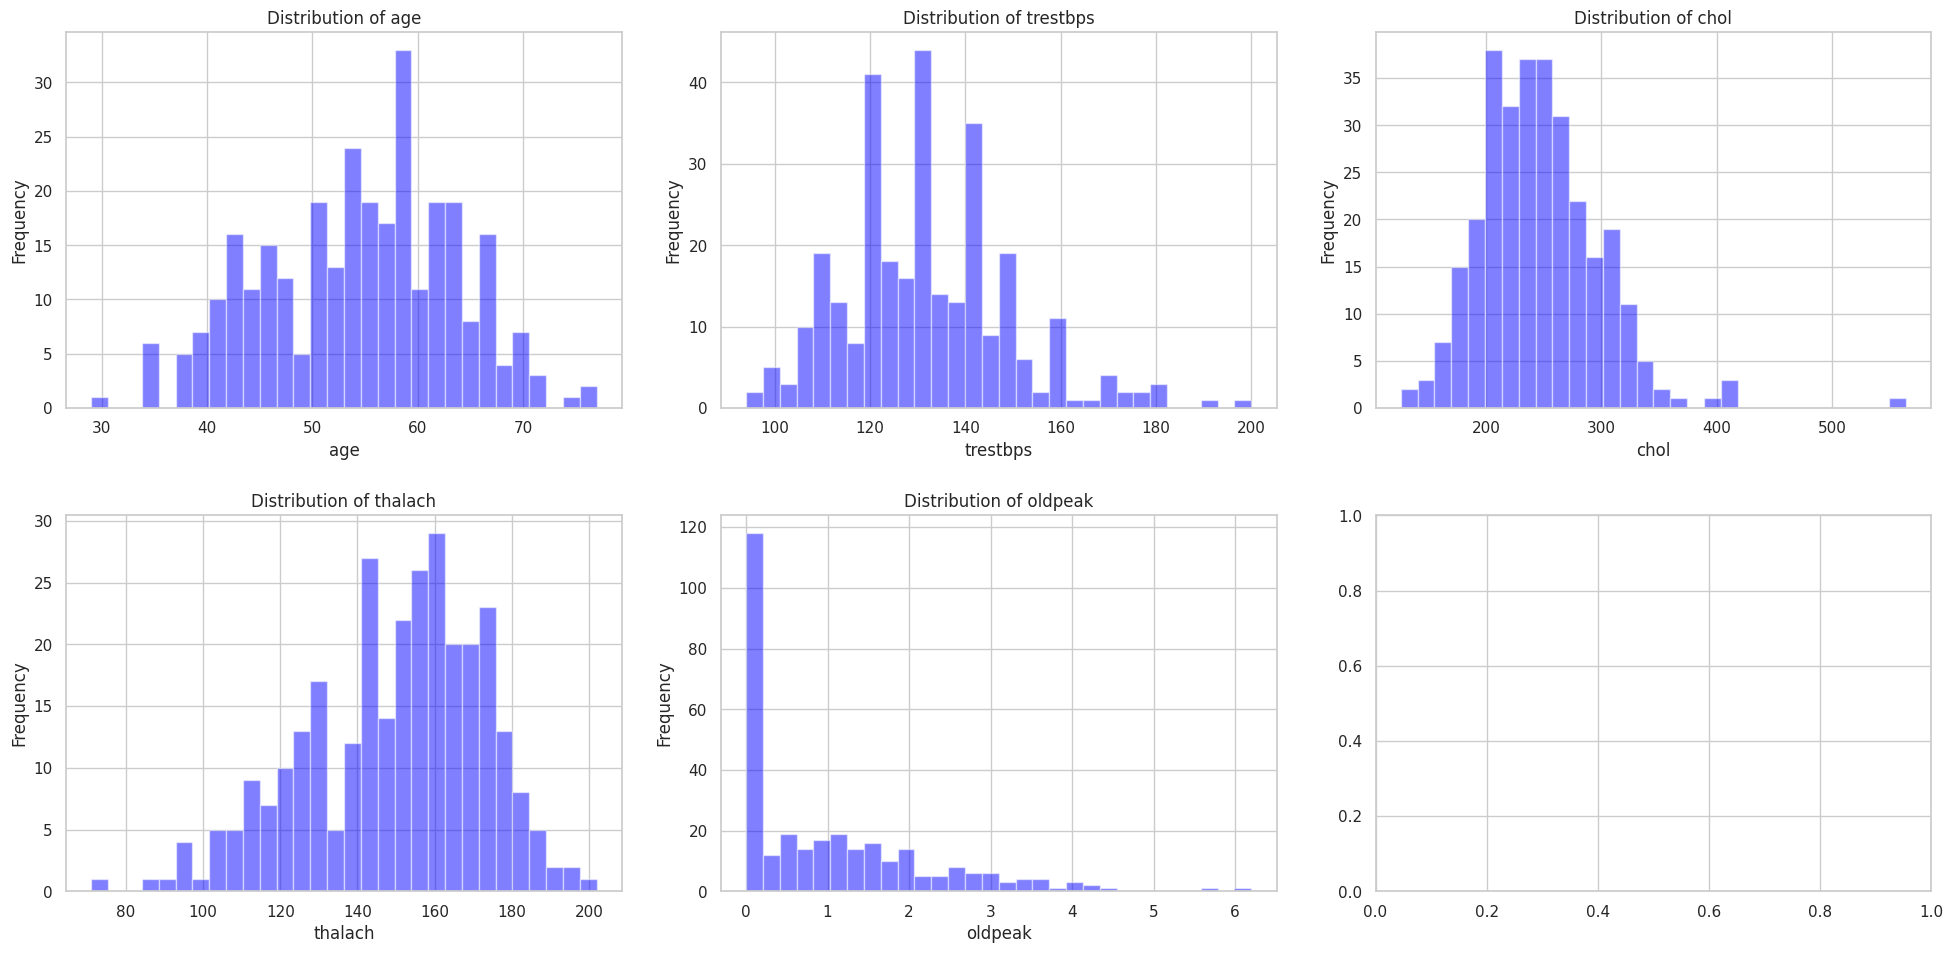

In [ ]:
plot_distributions(data[selected_col_hist])

In [ ]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

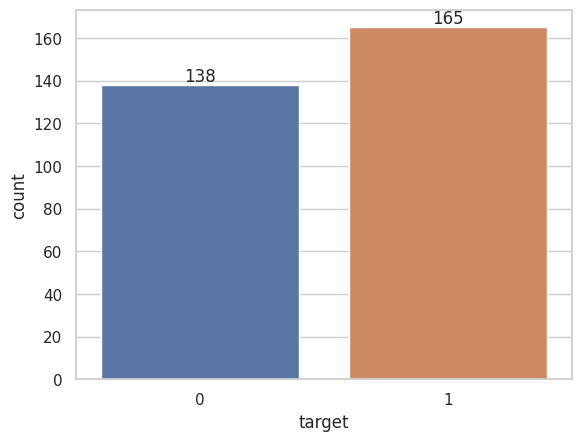

In [ ]:
plt.subplot()
ax = sns.countplot(data=data, x="target")
ax.bar_label(ax.containers[0]);

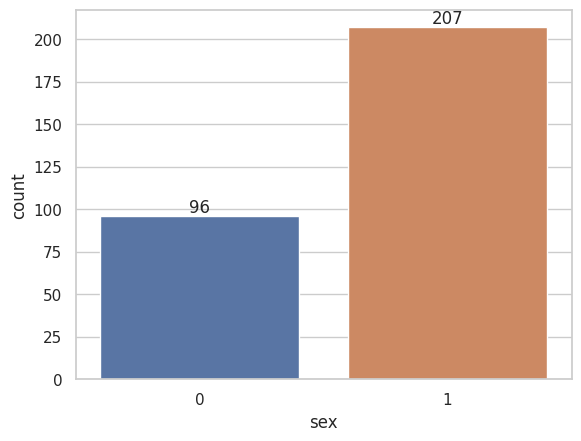

In [ ]:
plt.subplot()
ax = sns.countplot(data=data, x="sex")
ax.bar_label(ax.containers[0]);

In [ ]:
data.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

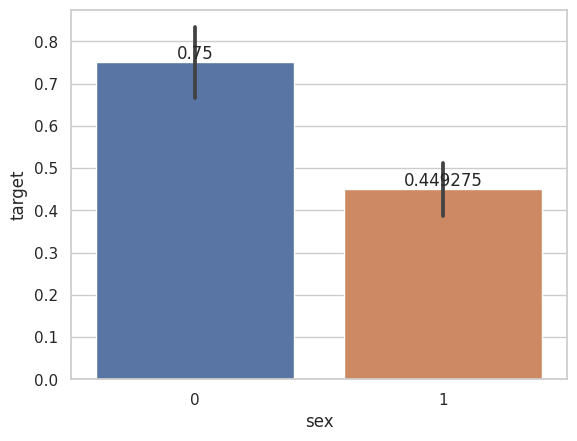

In [ ]:
plt.subplot()
ax = sns.barplot(data=data, x="sex", y="target")
ax.bar_label(ax.containers[0]);

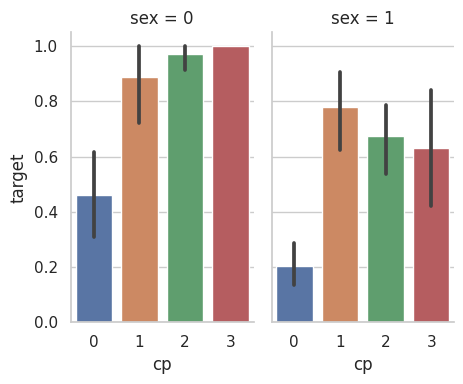

In [ ]:
sns.catplot(
    data=data, x="cp", y="target", col="sex",
    kind="bar", height=4, aspect=.6,
)

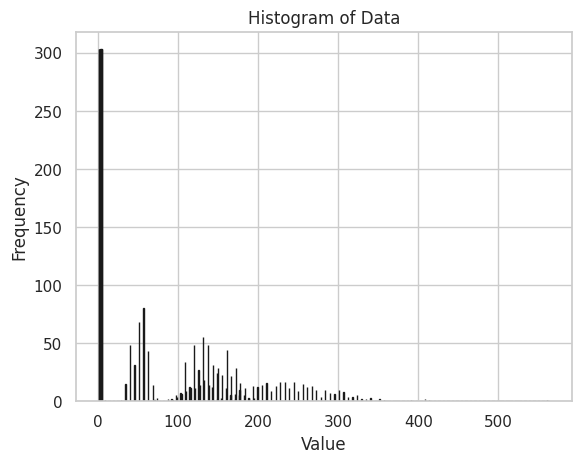

In [ ]:
plt.hist(data, bins=100, edgecolor='k')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
z_threshold = 2
outliers = np.where(np.abs((data - np.mean(data)) / np.std(data)) > z_threshold)

# حذف اوت لایرها با استفاده از boolean indexing
data = data[np.logical_not(np.isin(np.arange(len(data)), outliers))]

print("Cleaned Data:", data)

Cleaned Data:      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2     41    0   1       130   204    0        0      172      0      1.4   
13    64    1   3       110   211    0        0      144      1      1.8   
15    50    0   2       120   219    0        1      158      0      1.6   
16    58    0   2       120   340    0        1      172      0      0.0   
18    43    1   0       150   247    0        1      171      0      1.5   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
293   67    1   2       152   212    0        0      150      0      0.8   
296   63    0   0       124   197    0        1      136      1      0.0   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
2        2   0     2       1  
13       1 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
z_threshold = 2
outliers = np.abs((data - np.mean(data)) / np.std(data)) > z_threshold

# حذف اوت لایرها از دیتاست
cleaned_data = data[~outliers]

print("Cleaned Data:", cleaned_data)

Cleaned Data:       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
2    41.0    0  1.0     130.0  204.0    0        0    172.0      0      1.4   
13   64.0    1  NaN     110.0  211.0    0        0    144.0      1      1.8   
15   50.0    0  2.0     120.0  219.0    0        1    158.0      0      1.6   
16   58.0    0  2.0     120.0    NaN    0        1    172.0      0      0.0   
18   43.0    1  0.0     150.0  247.0    0        1    171.0      0      1.5   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
293  67.0    1  2.0     152.0  212.0    0        0    150.0      0      0.8   
296  63.0    0  0.0     124.0  197.0    0        1    136.0      1      0.0   
298  57.0    0  0.0     140.0  241.0    0        1    123.0      1      0.2   
299  45.0    1  NaN     110.0  264.0    0        1    132.0      0      1.2   
302  57.0    0  1.0     130.0  236.0    0        0    174.0      0      0.0   

     slope   ca  thal  target  
2    

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# **Functions**

In [ ]:
def load_data(dataset_path):
    df = pd.read_csv(dataset_path)
    return df

def clean_data(df):
    # remove dublicates
    df.drop_duplicates(inplace=True)

    # remove NaN
    df.dropna(inplace=True)

    # reset index
    df.reset_index(inplace=True, drop=True)

    return df

def split_preprocessing_data(df, z_threshold=2):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    # Identify outlier indices
    z_scores = np.abs((X - np.mean(X, axis=0)) / np.std(X, axis=0))
    outlier_indices = np.where(z_scores > z_threshold)

    # Remove rows containing outliers
    X_cleaned = np.delete(X, outlier_indices[0], axis=0)
    y_cleaned = np.delete(y, outlier_indices[0])

    X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, random_state=380)

    # Scaler
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    return X_train, X_test, y_train, y_test

def train_model(model, X_train, y_train):
    model_obj = model
    model_obj.fit(X_train, y_train)

    return model_obj

def model_evaluation(pre_train_model, X_test, y_test, return_df=True, pipline=False):
    # prediction
    y_pred = pre_train_model.predict(X_test)

    metrics_dict = dict()

    # metrics
    metrics_dict["accuracy"] = metrics.accuracy_score(y_test, y_pred)
    metrics_dict["f1_score"] = metrics.f1_score(y_test, y_pred)
    metrics_dict["recall"] = metrics.recall_score(y_test, y_pred)
    metrics_dict["precision"] = metrics.precision_score(y_test, y_pred)

    if return_df and pipline == False:
        metrics_df = pd.DataFrame([metrics_dict])
        metrics_df.insert(0, "model", type(pre_train_model).__name__)

        return metrics_df #.style.background_gradient(cmap="coolwarm")

    elif return_df and pipline:
        metrics_df = pd.DataFrame([metrics_dict])
        metrics_df.insert(0, "model", type(pre_train_model.best_estimator_.steps[-1][-1]).__name__)

        return metrics_df #.style.background_gradient(cmap="coolwarm")

    else:
        return metrics_dict

In [ ]:
def model_comparison(model):
    df = load_data("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Classification/heart.csv")
    df = clean_data(df)
    X_train, X_test, y_train, y_test = split_preprocessing_data(df, z_threshold=2)
    model_t = train_model(model, X_train, y_train)
    return model_evaluation(model_t, X_test, y_test, return_df=True)

In [ ]:
models = [
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    xgb.XGBClassifier(),
    RandomForestClassifier()
]

In [ ]:
[model_comparison(model)for model in models]

[                  model  accuracy  f1_score    recall  precision
 0  KNeighborsClassifier  0.844444  0.881356  0.928571    0.83871,
                 model  accuracy  f1_score    recall  precision
 0  AdaBoostClassifier  0.711111   0.77193  0.785714   0.758621,
   model  accuracy  f1_score    recall  precision
 0   SVC  0.822222  0.866667  0.928571     0.8125,
                     model  accuracy  f1_score    recall  precision
 0  DecisionTreeClassifier  0.822222  0.857143  0.857143   0.857143,
            model  accuracy  f1_score    recall  precision
 0  XGBClassifier  0.911111  0.931034  0.964286        0.9,
                     model  accuracy  f1_score    recall  precision
 0  RandomForestClassifier  0.844444  0.881356  0.928571    0.83871]

In [ ]:
m_df = pd.concat([model_comparison(model)for model in models], ignore_index=True).sort_values(by="model").reset_index(drop=True)
m_df.style.background_gradient(cmap='coolwarm')

,model,accuracy,f1_score,recall,precision
0,AdaBoostClassifier,0.711111,0.771930,0.785714,0.758621
1,DecisionTreeClassifier,0.755556,0.784314,0.714286,0.869565
2,KNeighborsClassifier,0.844444,0.881356,0.928571,0.838710
3,RandomForestClassifier,0.822222,0.862069,0.892857,0.833333
4,SVC,0.822222,0.866667,0.928571,0.812500
5,XGBClassifier,0.911111,0.931034,0.964286,0.900000


# Hyperparameter Tuning

In [ ]:
df = load_data("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Classification/heart.csv")
df = clean_data(df)
X_train, X_test, y_train, y_test = split_preprocessing_data(df, z_threshold=2)

In [ ]:
pipe_lr = Pipeline([("scl", StandardScaler()),
                    ("LR", LogisticRegression(random_state=42))])

pipe_dt = Pipeline([("scl", StandardScaler()),
                    ("DT",DecisionTreeClassifier(random_state=42))])

pipe_rf = Pipeline([("scl", StandardScaler()),
                    ("RF",RandomForestClassifier(random_state=42))])

pipe_knn = Pipeline([("scl", StandardScaler()),
                    ("KNN", KNeighborsClassifier())])

pipe_svm = Pipeline([("scl", StandardScaler()),
                     ("SVM", SVC(random_state=42))])

pipe_adaboost = Pipeline([("scl", StandardScaler()),
                     ("adaboost", AdaBoostClassifier(random_state=42))])

pipe_xgb = Pipeline([("scl", StandardScaler()),
                     ("XGB", xgb.XGBClassifier(random_state=42))])

In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150, 1000]
learning_rates = [.1, .2, .3]


lr_param_grid = [{
    'LR__penalty': ['l1', 'l2'],
    'LR__C': param_range_fl,
    'LR__solver': ['liblinear']
}]


dt_param_grid = [{
    'DT__criterion': ['gini', 'entropy'],
    'DT__min_samples_leaf': param_range,
    'DT__max_depth': param_range,
    'DT__min_samples_split': param_range[1:]
}]


rf_param_grid = [{
    'RF__min_samples_leaf': param_range,
    'RF__max_depth': param_range,
    'RF__min_samples_split': param_range[1:],
    'RF__min_samples_leaf': param_range[:4],
    'RF__n_estimators': n_estimators
}]


knn_param_grid = [{
    'KNN__n_neighbors': param_range,
    'KNN__weights': ['uniform', 'distance'],
    'KNN__metric': ['euclidean', 'manhattan']
}]


svm_param_grid = [{
    'SVM__kernel': ['linear', 'rbf'],
    'SVM__C': param_range,
}]


xgb_param_grid = [{
    'XGB__learning_rate': learning_rates,
    'XGB__max_depth': param_range,
    'XGB__min_child_weight': param_range[:2],
    'XGB__subsample': param_range_fl,
    'XGB__n_estimators': n_estimators
}]

In [ ]:
lr_grid_search = GridSearchCV(
    estimator=pipe_lr,
    param_grid=lr_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

dt_grid_search = GridSearchCV(
    estimator=pipe_dt,
    param_grid=dt_param_grid,

    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

rf_grid_search = GridSearchCV(
    estimator=pipe_rf,
    param_grid=rf_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

knn_grid_search = GridSearchCV(
    estimator=pipe_knn,
    param_grid=knn_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

svm_grid_search = GridSearchCV(
    estimator=pipe_svm,
    param_grid=svm_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

xgb_grid_search = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

In [ ]:
grids = [
    lr_grid_search,
    dt_grid_search,
    rf_grid_search,
    knn_grid_search,
    svm_grid_search,
    xgb_grid_search
]

for pipe in grids:
    pipe.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [ ]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))
    print('-'*100)

Logistic Regression Test Accuracy: 0.896551724137931
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
----------------------------------------------------------------------------------------------------
Decision Trees Test Accuracy: 0.8235294117647057
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 6, 'DT__min_samples_leaf': 2, 'DT__min_samples_split': 6}
----------------------------------------------------------------------------------------------------
Random Forest Test Accuracy: 0.8813559322033899
Random Forest Best Params: {'RF__max_depth': 4, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5, 'RF__n_estimators': 100}
----------------------------------------------------------------------------------------------------
K-Nearest Neighbors Test Accuracy: 0.9310344827586207
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
----------------------------

In [ ]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'Support Vector Machines', 5: 'XGBoost'}

pd.concat([model_evaluation(model, X_test, y_test, return_df=True, pipline=True) for i, model in enumerate(grids)], ignore_index=True).style.background_gradient(cmap='coolwarm')

,model,accuracy,f1_score,recall,precision
0,LogisticRegression,0.866667,0.896552,0.928571,0.866667
1,DecisionTreeClassifier,0.800000,0.823529,0.750000,0.913043
2,RandomForestClassifier,0.844444,0.881356,0.928571,0.838710
3,KNeighborsClassifier,0.911111,0.931034,0.964286,0.900000
4,SVC,0.844444,0.881356,0.928571,0.838710
5,XGBClassifier,0.911111,0.933333,1.000000,0.875000


In [ ]:
lr_grid_search = GridSearchCV(
    estimator=pipe_lr,
    param_grid=lr_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=10
)

dt_grid_search = GridSearchCV(
    estimator=pipe_dt,
    param_grid=dt_param_grid,

    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=10
)

rf_grid_search = GridSearchCV(
    estimator=pipe_rf,
    param_grid=rf_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=10
)

knn_grid_search = GridSearchCV(
    estimator=pipe_knn,
    param_grid=knn_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=10
)

svm_grid_search = GridSearchCV(
    estimator=pipe_svm,
    param_grid=svm_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=10
)

xgb_grid_search = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=xgb_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=10
)

In [ ]:
grids = [
    lr_grid_search,
    dt_grid_search,
    rf_grid_search,
    knn_grid_search,
    svm_grid_search,
    xgb_grid_search
]

for pipe in grids:
    pipe.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


In [ ]:


grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'Support Vector Machines', 5: 'XGBoost'}

pd.concat([model_evaluation(model, X_test, y_test, return_df=True, pipline=True) for i, model in enumerate(grids)], ignore_index=True).style.background_gradient(cmap='coolwarm')